<a href="https://colab.research.google.com/github/amindazad/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [X] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [X] Make at least 1 partial dependence plot to explain your model.
- [X] Make at least 1 Shapley force plot to explain an individual prediction.
- [X] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap
    !pip install pandas-profiling==2.*
# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/amindazad/ATP_ITF_TennisMatch_Winner/master/all_matches.csv', header=1)
# Choose my target 
target = 'player_victory'
# I want to predict tennis match winner based on the match data, my target is catagorical (True/False)
# Hence -> Classification 

# Take a look at the target 
df['player_victory'].describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


count     54150
unique        2
top           t
freq      27076
Name: player_victory, dtype: object

In [3]:
# Choosing a baseline and look at the distribution to start 

df['player_victory'].value_counts(normalize=True)
# They are both very close not tot imbalanced , I'm going to choose T(Win)=50% as baseline

t    0.500018
f    0.499982
Name: player_victory, dtype: float64

In [4]:
df['player_victory'].nunique()
# As mentioned earlier, only two classes so classification problem

2

In [5]:
df.dtypes

start_date                               object
end_date                                 object
location                                 object
court_surface                            object
prize_money                             float64
currency                                 object
year                                      int64
player_id                                object
player_name                              object
opponent_id                              object
opponent_name                            object
tournament                               object
round                                    object
num_sets                                  int64
sets_won                                  int64
games_won                                 int64
games_against                             int64
tiebreaks_won                             int64
tiebreaks_total                           int64
serve_rating                            float64
aces                                    

In [0]:
from pandas_profiling import ProfileReport

#Check out the NaN values distribution among all variables 
#profile = ProfileReport(df)
#profile

In [7]:
# Check out NaN values 
df.isnull().sum().sort_values()
# Seems like most of the features we want to use have the same number of NaN values 

start_date                                  0
doubles                                     0
retirement                                  0
player_victory                              0
masters                                     0
tiebreaks_total                             0
tiebreaks_won                               0
games_against                               0
games_won                                   0
sets_won                                    0
num_sets                                    0
round                                       0
round_num                                   0
opponent_id                                 0
end_date                                    0
player_id                                   0
year                                        0
location                                    0
court_surface                               0
tournament                                  0
won_first_set                             714
seed                              

In [8]:
# Lets drop them
df_cleaned = df.dropna()
df_cleaned

,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,sets_won,games_won,games_against,tiebreaks_won,tiebreaks_total,serve_rating,aces,double_faults,first_serve_made,first_serve_attempted,first_serve_points_made,first_serve_points_attempted,second_serve_points_made,second_serve_points_attempted,break_points_saved,break_points_against,service_games_won,return_rating,first_serve_return_points_made,first_serve_return_points_attempted,second_serve_return_points_made,second_serve_return_points_attempted,break_points_made,break_points_attempted,return_games_played,service_points_won,service_points_attempted,return_points_won,return_points_attempted,total_points_won,total_points,duration,player_victory,retirement,seed,won_first_set,doubles,masters,round_num
19719,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,adrian-mannarino,A. Mannarino,matthias-bachinger,M. Bachinger,loughborough_challenger,Round of 32,3,1,10,16,0,0,218.0,2.0,4.0,49.0,90.0,29.0,49.0,19.0,41.0,10.0,15.0,13.0,185.0,10.0,42.0,13.0,28.0,2.0,2.0,13.0,48.0,90.0,23.0,70.0,71.0,160.0,01:42:00,f,f,2,f,f,100,3
19720,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,alexander-slabinsky,A. Slabinsky,luke-bambridge,L. Bambridge,loughborough_challenger,2nd Round Qualifying,2,2,12,4,0,0,282.0,3.0,2.0,30.0,46.0,22.0,30.0,9.0,16.0,1.0,2.0,8.0,228.0,11.0,30.0,19.0,24.0,5.0,10.0,8.0,31.0,46.0,30.0,54.0,61.0,100.0,00:56:00,t,f,4,t,f,100,1
19721,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,alexander-slabinsky,A. Slabinsky,sean-thornley,S. Thornley,loughborough_challenger,3rd Round Qualifying,2,0,11,14,0,1,252.0,3.0,2.0,45.0,76.0,31.0,45.0,15.0,31.0,1.0,4.0,12.0,124.0,13.0,41.0,18.0,42.0,2.0,6.0,12.0,46.0,76.0,31.0,83.0,77.0,159.0,01:36:00,f,f,4,f,f,100,2
19726,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,andreas-haider-maurer,A. Haider-Maurer,james-ward,J. Ward,loughborough_challenger,Quarter-Finals,2,0,5,12,0,0,236.0,7.0,2.0,23.0,47.0,20.0,23.0,8.0,24.0,4.0,7.0,8.0,51.0,7.0,29.0,6.0,22.0,0.0,3.0,9.0,28.0,47.0,13.0,51.0,41.0,98.0,01:07:00,f,f,3,f,f,100,5
19727,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,andreas-haider-maurer,A. Haider-Maurer,sean-thornley,S. Thornley,loughborough_challenger,Round of 32,2,2,12,3,0,0,300.0,4.0,3.0,24.0,46.0,20.0,24.0,14.0,22.0,1.0,1.0,8.0,224.0,9.0,18.0,12.0,20.0,4.0,7.0,7.0,34.0,46.0,21.0,38.0,55.0,84.0,00:59:00,t,f,3,t,f,100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54143,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,tommy-robredo,T. Robredo,lorenzo-giustino,L. Giustino,cordenons_challenger,Round of 32,2,2,13,7,1,1,237.0,3.0,7.0,30.0,66.0,22.0,30.0,19.0,36.0,3.0,6.0,10.0,236.0,13.0,32.0,18.0,26.0,5.0,7.0,9.0,41.0,66.0,31.0,58.0,72.0,124.0,01:31:00,t,f,5,t,f,100,3
54144,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,tommy-robredo,T. Robredo,paolo-lorenzi,P. Lorenzi,cordenons_challenger,Quarter-Finals,2,0,6,12,0,0,234.0,1.0,1.0,38.0,51.0,22.0,38.0,6.0,13.0,2.0,6.0,9.0,104.0,9.0,29.0,11.0,26.0,1.0,5.0,9.0,28.0,51.0,20.0,55.0,48.0,106.0,01:18:00,f,f,5,f,f,100,5
54147,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,carlos-gomez-herrera,C. Gomez-Herrera,cordenons_challenger,Round of 32,2,2,12,7,0,0,287.0,1.0,0.0,47.0,59.0,32.0,47.0,6.0,12.0,5.0,6.0,9.0,164.0,23.0,53.0,9.0,18.0,4.0,13.0,10.0,38.0,59.0,32.0,71.0,70.0,130.0,01:26:00,t,f,6,t,f,100,3
54148,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,francesco-forti,F. Forti,cordenons_challenger,Round of 16,2,2,12,5,0,0,243.0,2.0,2.0,30.0,49.0,19.0,30.0,10.0,19.0,1.0,4.0,9.0,25

In [9]:
# Choosing the features

# I'm going to cosider all features in our dataset are important and later on
# We're going to remove the ones with high cardinality, leakage through our data 
# Cleaning and Wrangling process

# Lets first divide the data randomly using train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_cleaned, train_size=0.85, test_size=0.15, 
                              stratify=df_cleaned['player_victory'], random_state=42)

train, val = train_test_split(train, train_size=0.85, test_size=0.15, stratify=train['player_victory'],
                               random_state=42)

train.shape, val.shape, test.shape

((4251, 53), (751, 53), (883, 53))

In [10]:
# Define a funcltion to wrangle all our datasets and do make feature engeering easier
def wrangle(X) :
  #Prevent SettingWithCopyWarning
  X=X.copy()
  #convert Start_date and End_date , duration and Year to datetime format 
  X['start_date'] = pd.to_datetime(X['start_date'], infer_datetime_format=True)
  X['end_date'] = pd.to_datetime(X['end_date'], infer_datetime_format=True)
  #X['year'] = pd.to_datetime(X['year'], infer_datetime_format=True)
  #X['duration'] = pd.to_datetime(X['duration'], infer_datetime_format=True)
  #X['duration'] = pd.DatetimeIndex(X['duration'])
  return X 

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.shape, val.shape, test.shape

((4251, 53), (751, 53), (883, 53))

In [0]:
#drop target from train
train_features = train.drop(columns=[target])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [12]:
# Lets try a shallow decision tree as a fast first model
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=3))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9920106524633822

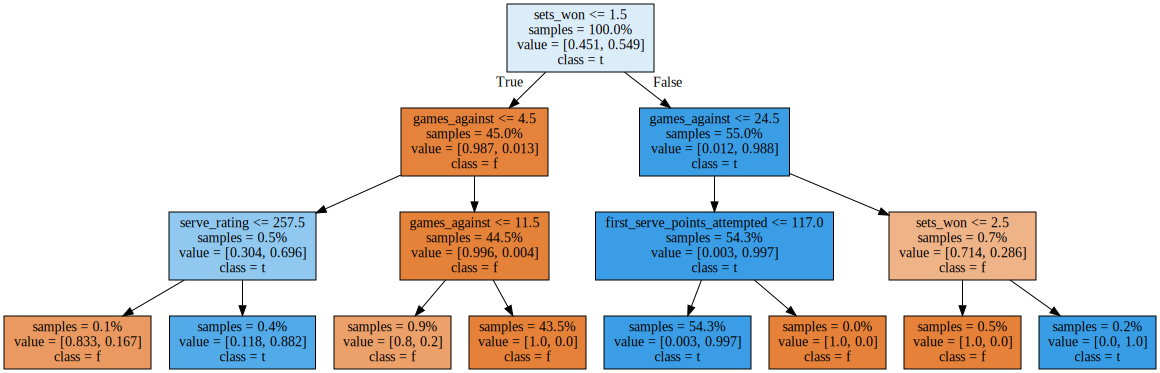

In [13]:
# Probably has a leakage, too good to be true 
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [14]:
# Let's remove year, our goal is to predict the winner based on match statistics 
# not the year it took place 

train_features = train.drop(columns=[target,'sets_won', 'games_won', 'games_against',
                                     'total_points_won', 'year'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=4))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9174434087882823

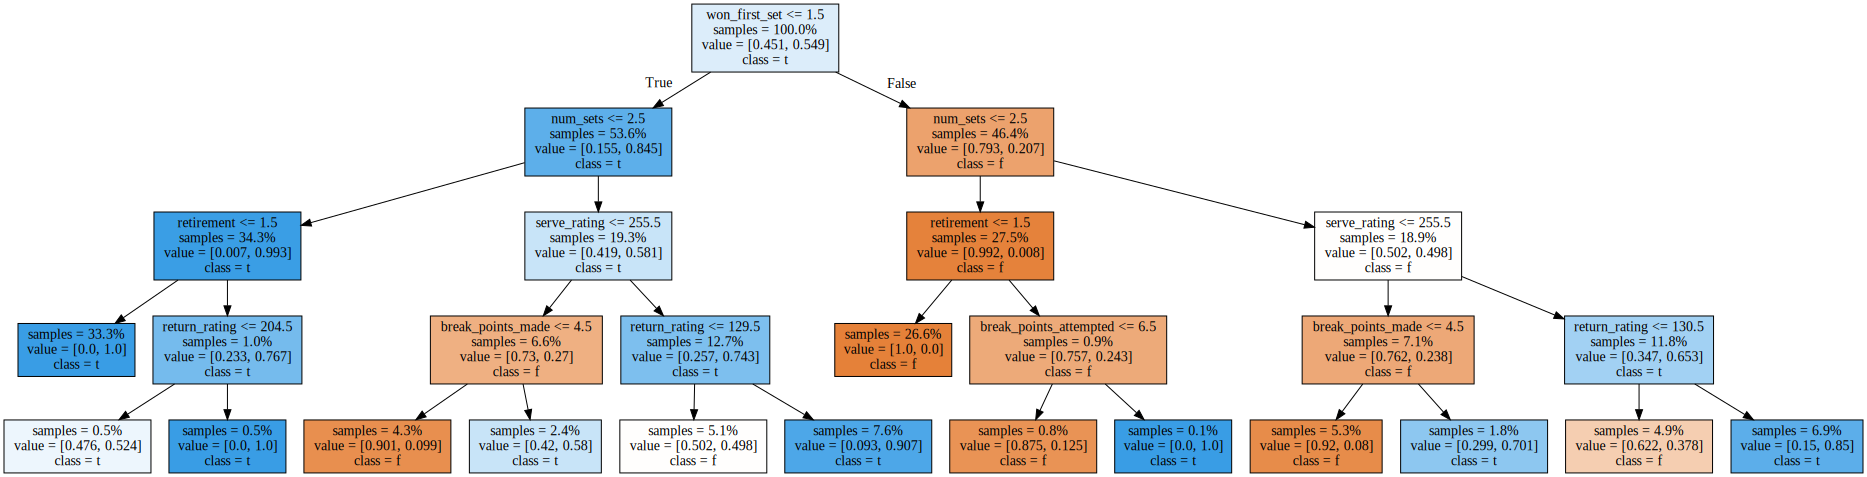

In [15]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [16]:
# We're pretty good now, I'm gonna come back and remove all the columns 
# that are not related to match stats and try again, use some domain experties!

# For now lets move on and calculate our ROC AUC, our initial baseline and decisiontree
# are good eval metrics but just in case 

from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]
roc_auc_score(y_val, y_pred_proba)

0.9729322393103647

In [0]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(train, minimal=True).to_notebook_iframe()
#profile

In [18]:
# Lets remove everything but the match stats and prize info from features

train_features = train.drop(columns=[target,'sets_won', 'games_won', 'games_against',
                                     'total_points_won', 'year', 'currency', 'location',
                                     'player_name', 'opponent_id', 'player_id', 'opponent_name',
                                     'tournament', 'total_points', 'retirement', 'doubles'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier())

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9121171770972037

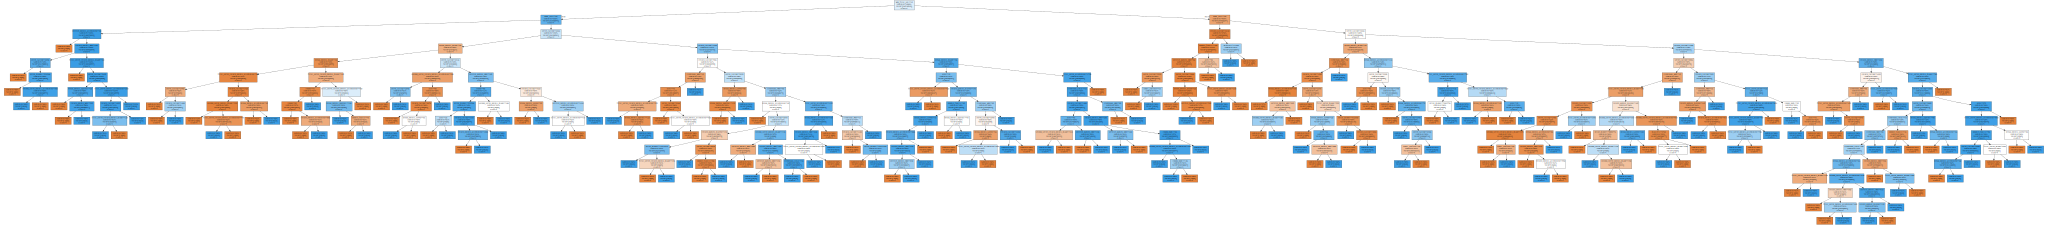

In [19]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [20]:
import plotly.express as px 
px.scatter_3d(train, x='player_victory', y='num_sets', z='serve_rating', color='prize_money')

In [21]:
px.scatter(train, x='player_victory', y='serve_rating', color='prize_money')

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9587217043941412


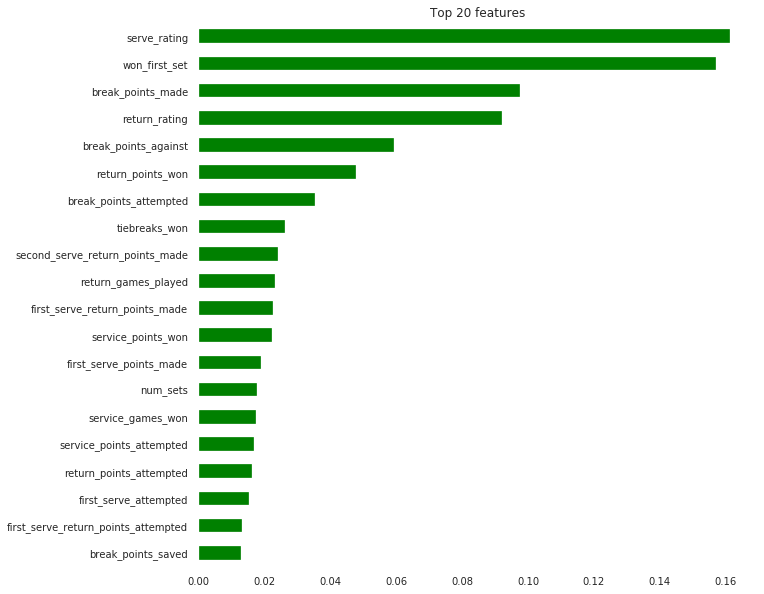

In [23]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='green');

In [24]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [26]:
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names)

Weight,Feature
0.0756 ± 0.0126,serve_rating
0.0546 ± 0.0108,won_first_set
0.0386 ± 0.0115,return_rating
0.0383 ± 0.0039,break_points_made
0.0218 ± 0.0027,tiebreaks_won
0.0146 ± 0.0098,service_points_won
0.0120 ± 0.0061,return_points_won
0.0107 ± 0.0056,first_serve_points_made
0.0075 ± 0.0055,break_points_attempted
0.0059 ± 0.0013,num_sets


In [27]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9547270306258322


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

# 1% increase using boosting !!! Hoorraaaaaay ! 

Validation Accuracy 0.9693741677762983


In [29]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000, 
    max_depth=7,     
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='error', 
          early_stopping_rounds=50)

[0]	validation_0-error:0.049635	validation_1-error:0.073236
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.038109	validation_1-error:0.071904
[2]	validation_0-error:0.028699	validation_1-error:0.069241
[3]	validation_0-error:0.021407	validation_1-error:0.071904
[4]	validation_0-error:0.014585	validation_1-error:0.045273
[5]	validation_0-error:0.011527	validation_1-error:0.050599
[6]	validation_0-error:0.006822	validation_1-error:0.047936
[7]	validation_0-error:0.005646	validation_1-error:0.043941
[8]	validation_0-error:0.00494	validation_1-error:0.043941
[9]	validation_0-error:0.003999	validation_1-error:0.039947
[10]	validation_0-error:0.002117	validation_1-error:0.041278
[11]	validation_0-error:0.001176	validation_1-error:0.041278
[12]	validation_0-error:0.000706	validation_1-error:0.041278
[13]	validation_0-error:0.00047	validation_1-error:0.0399

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

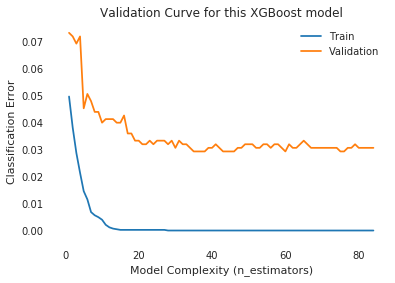

In [30]:
results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
plt.legend();

In [0]:
# One feature PDP and increase the pic quality (dot per inch)
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature_pdp_1 = 'serve_rating'

isolated = pdp_isolate(
    model = pipeline,
    dataset=X_val,
    model_features = X_val.columns, 
    feature = feature_pdp_1
)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdeda128ac8>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdeda166860>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


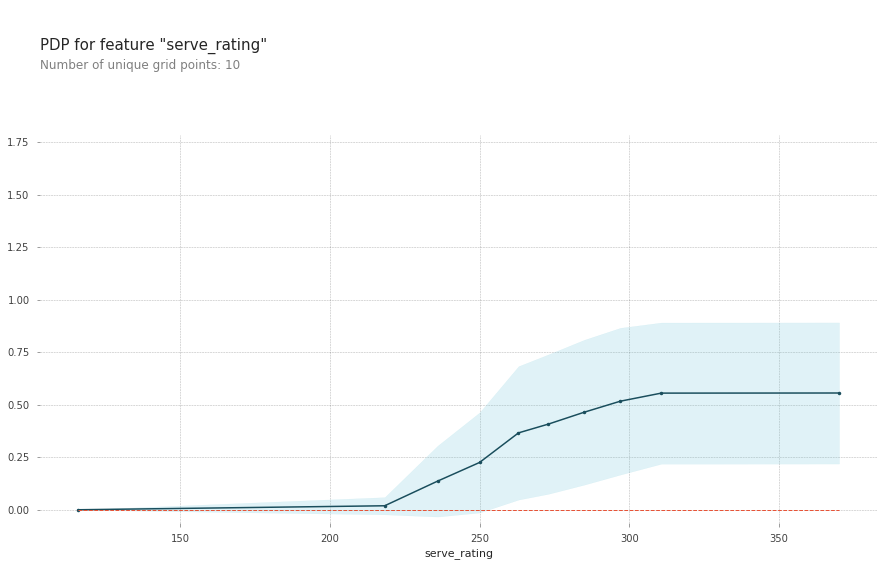

In [33]:
pdp_plot(isolated, feature_name= feature_pdp_1)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fde9804a5c0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fde980f50f0>})

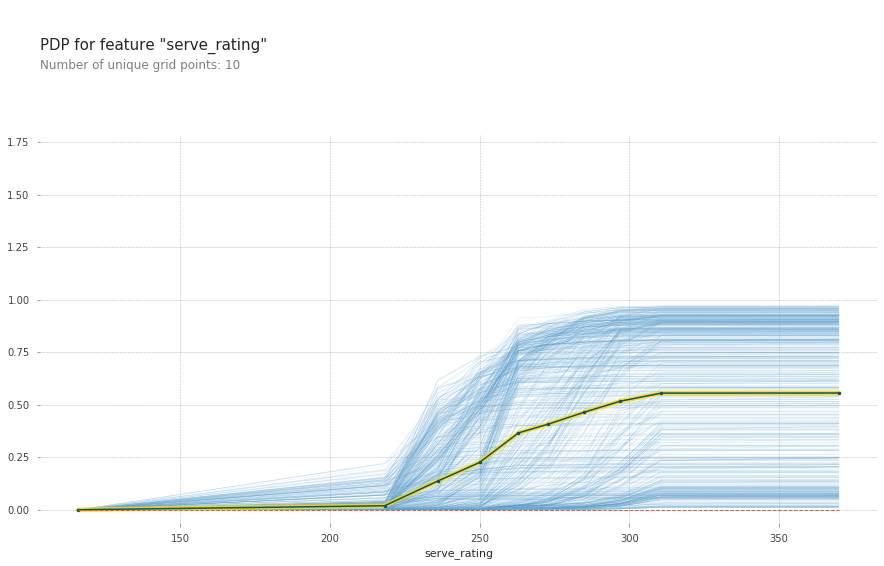

In [34]:
# With ICE curves 
pdp_plot(isolated, feature_name= feature_pdp_1, plot_lines=True, frac_to_plot=1)

In [0]:
# Multiple features PDP

from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [0]:
features_pdp_2 = ['serve_rating', 'break_points_made']

interactions = pdp_interact(
    model=pipeline,
    dataset = X_val, 
    model_features = X_val.columns,
    features=features_pdp_2
)

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fde97719a20>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fde97751e48>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


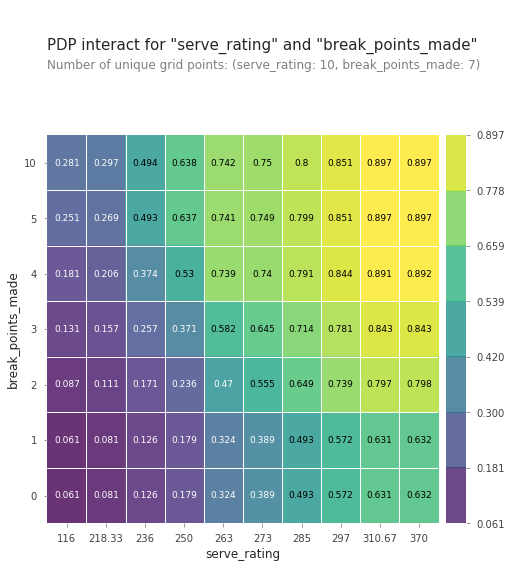

In [37]:
pdp_interact_plot(interactions, plot_type='grid',feature_names=features_pdp_2)

TypeError: ignored

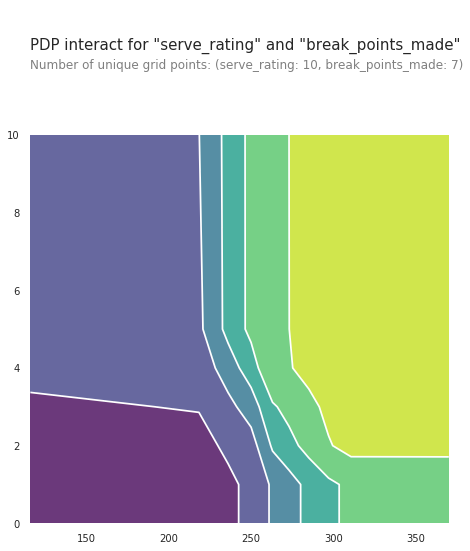

In [38]:
pdp_interact_plot(interactions, plot_type='contour',feature_names=features_pdp_2)

In [0]:
# 3d plotly plot 
pdp = interactions.pdp.pivot_table(
    values='preds', 
    columns=features_pdp_2[0], 
    index=features_pdp_2[1]
)[::-1] 

In [40]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

In [41]:
# Shap values 
import shap
from sklearn.impute import SimpleImputer


processor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(strategy='most_frequent',))

X_train_processed= processor.fit_transform(X_train)
X_val_processed= processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)



[0]	validation_0-auc:0.954719	validation_1-auc:0.956429
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.963596	validation_1-auc:0.964838
[2]	validation_0-auc:0.973224	validation_1-auc:0.973
[3]	validation_0-auc:0.979345	validation_1-auc:0.977966
[4]	validation_0-auc:0.980083	validation_1-auc:0.977622
[5]	validation_0-auc:0.982676	validation_1-auc:0.980382
[6]	validation_0-auc:0.984665	validation_1-auc:0.98137
[7]	validation_0-auc:0.985169	validation_1-auc:0.982122
[8]	validation_0-auc:0.985537	validation_1-auc:0.982369
[9]	validation_0-auc:0.985631	validation_1-auc:0.982319
[10]	validation_0-auc:0.985986	validation_1-auc:0.98272
[11]	validation_0-auc:0.986332	validation_1-auc:0.982816
[12]	validation_0-auc:0.986596	validation_1-auc:0.98331
[13]	validation_0-auc:0.987095	validation_1-auc:0.983557
[14]	validation_0-auc:0.987044	validation_1-auc:0.9835
[15]	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values=shap_values, 
    features=row,
    link='logit'
)